In [1]:
# Most cases by TYPE
# Most cases by LOCATION
# Most cases by Season
# Seasons when more cases are resolved
# Time taken to resolve cases
# Correlate TYPE and LOCATION
# search for covid keywords in complaints (Masks, social distancing, etc)
# compare resolution time of covid and non covid cases
# Sentiment analysis of complaints
# Sentiment analysis based on TYPE
# Sentiment analysis based on LOCATION
# Sentiment analysis using ecometric data (ethinicity). Use Census tract data from Harvard Dataverse to identify ethnicity
# Sentiment analysis to classify liberal and conservative (conservative have strong opinions)

In [2]:
import pandas as pd
import datetime as dt

In [3]:
# Read data from csv
pre_covid_records = pd.read_csv('data\\311_Cases_2015_2019_Unrestricted.csv')
post_covid_records = pd.read_csv('data\\311_Cases_2020_2024_Unrestricted.csv')

# print(pre_covid_records.columns)
# ['Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION',
#        'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT', 'LocationID', 'X', 'Y',
#        'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD',
#        'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI',
#        'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM']

In [4]:
def parse_date(dateStr: str):
    return dt.datetime.strptime(dateStr, '%Y-%m-%d')

In [5]:
pre_covid_records['OPEN_DAY'] = pre_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).day)
pre_covid_records['OPEN_MONTH'] = pre_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).month)
pre_covid_records['OPEN_YEAR'] = pre_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).year)


post_covid_records['OPEN_DAY'] = post_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).day)
post_covid_records['OPEN_MONTH'] = post_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).month)
post_covid_records['OPEN_YEAR'] = post_covid_records['OPEN_DT'].apply(lambda entry : parse_date(entry).year)

In [6]:
def group_and_count(df, groupingColumn):
    df = df.groupby(groupingColumn)['CASE_ENQUIRY_ID'].nunique().reset_index(name='COUNT') \
        .sort_values(['COUNT'], ascending = False)
    df['Percentage'] = df['COUNT'] / df['COUNT'].sum() * 100
    return df

In [29]:
# Count each type of request and arrange them in decreasing order
pre_covid_type = group_and_count(pre_covid_records, 'TYPE')
print("Top 10 most common requests during 2015-2019")
top_10_types_pre_covid = pre_covid_type.head(10)
top_10_types_pre_covid

Top 10 most common requests during 2015-2019


,TYPE,COUNT,Percentage
59,General Request,175288,12.344651
127,Parking Enforcement,152303,10.725934
160,Requests for Street Cleaning,83461,5.877738
97,Missed Trash/Recycling/Yard Waste/Bulk Item,65984,4.646921
155,Request for Pothole Repair,59999,4.225427
167,Schedule a Bulk Item Pickup,57681,4.062182
80,Improper Storage of Trash (Barrels),52812,3.719283
157,Request for Snow Plowing,41207,2.902002
25,CE Collection,37325,2.628612
187,Street Light Outages,36854,2.595442


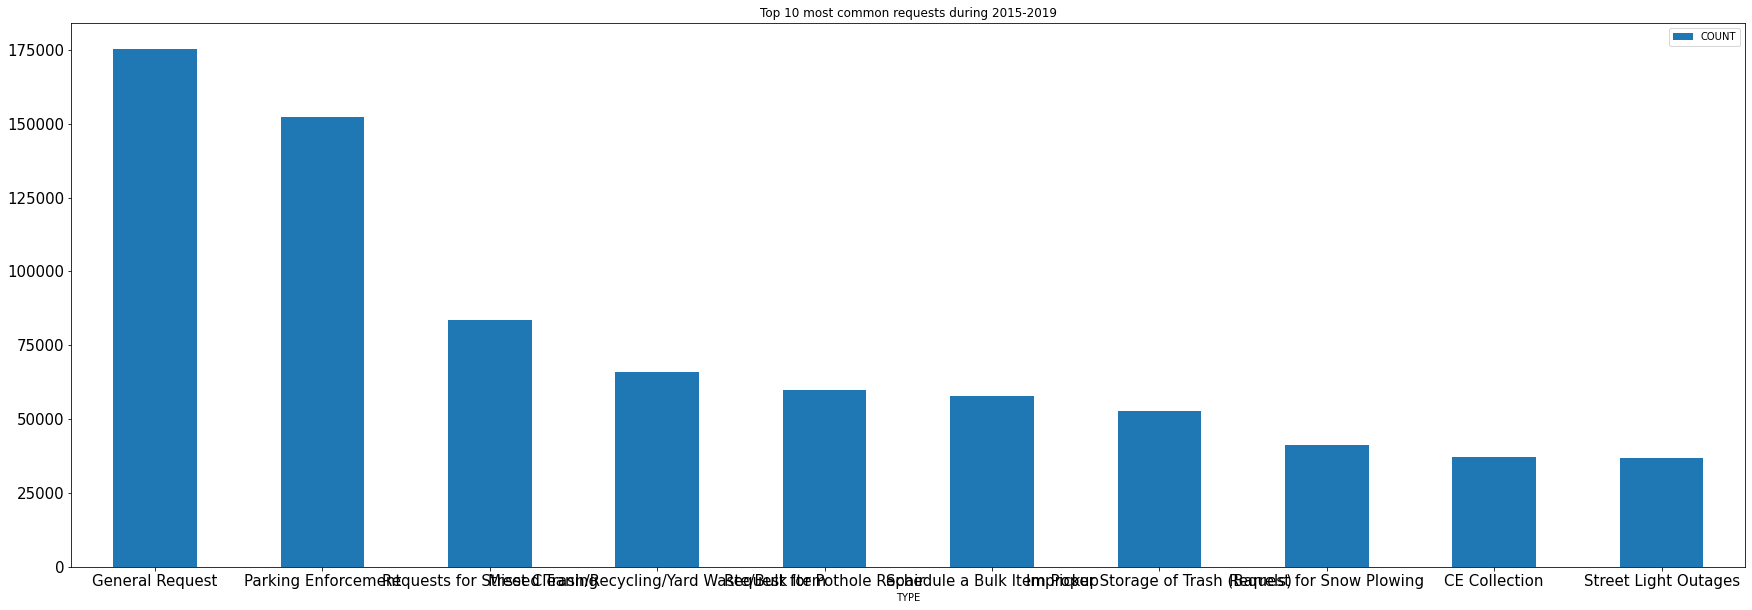

In [30]:
top_10_plot_pre_covid = top_10_types_pre_covid.plot.bar(x='TYPE', y='COUNT', rot=0,
                                              figsize=(30,10), fontsize = 15,
                                              title="Top 10 most common requests during 2015-2019")

In [31]:
post_covid_type = group_and_count(post_covid_records, 'TYPE')
print("\nTop 10 most common requests during 2020-2021")
top_10_types_post_covid = post_covid_type.head(10)
top_10_types_post_covid


Top 10 most common requests during 2020-2021


,TYPE,COUNT,Percentage
48,General Request,51047,16.839692
102,Parking Enforcement,38263,12.622429
133,Requests for Street Cleaning,18129,5.980504
82,Needle Pickup,14107,4.653702
140,Schedule a Bulk Item Pickup,13525,4.461708
64,Improper Storage of Trash (Barrels),11947,3.941148
78,Missed Trash/Recycling/Yard Waste/Bulk Item,11650,3.843172
128,Request for Pothole Repair,9460,3.120722
22,CE Collection,9146,3.017138
129,Request for Recycling Cart,8171,2.695499


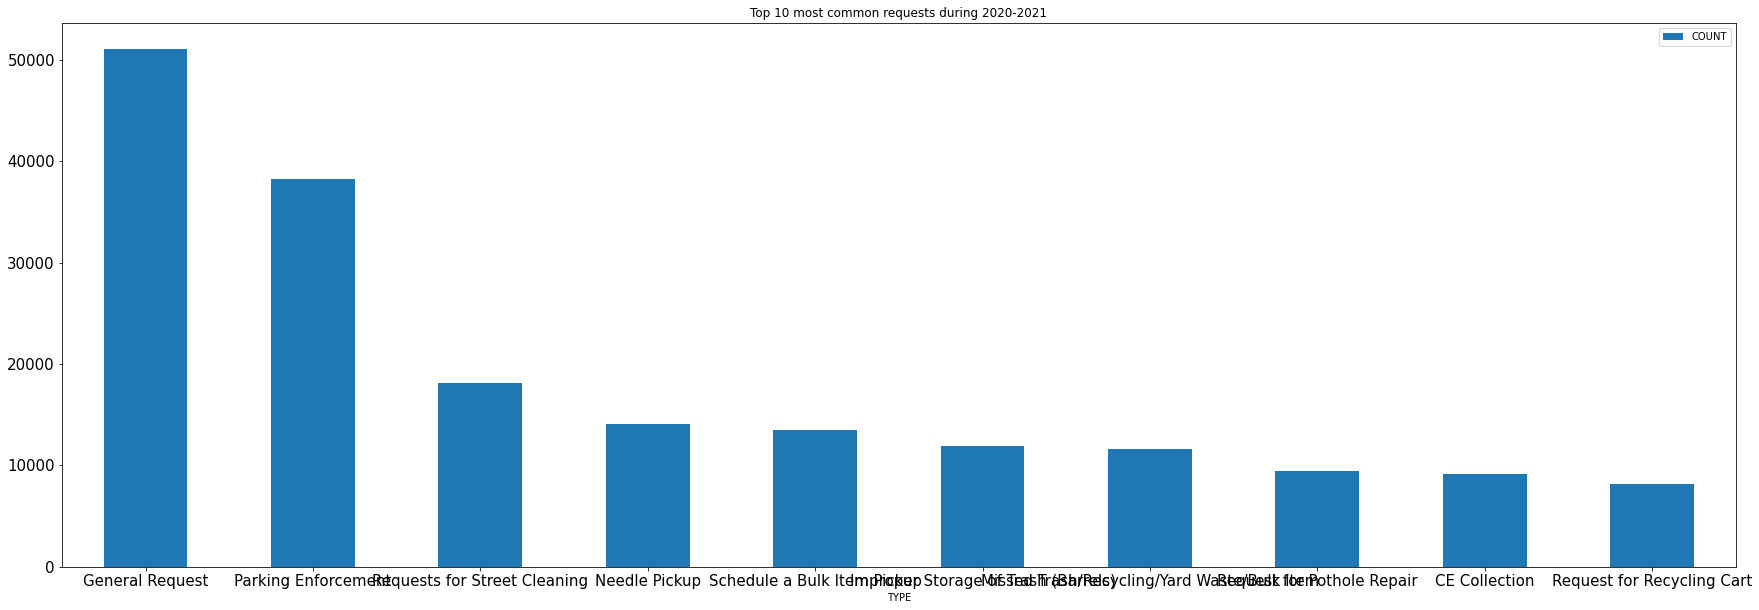

In [32]:
top_10_plot_post_covid = top_10_types_post_covid.plot.bar(x='TYPE', y='COUNT', rot=0,
                                              figsize=(30,10), fontsize = 15,
                                              title="Top 10 most common requests during 2020-2021")

In [8]:
#print(post_covid_records.head(1))

In [33]:
pre_covid_location = group_and_count(pre_covid_records, 'LOCATION')
print("Top 10 locations with highest number of complaints during 2015-2019")
top_10_locations_pre_covid = pre_covid_location.head(10)
top_10_locations_pre_covid

Top 10 locations with highest number of complaints during 2015-2019


,LOCATION,COUNT,Percentage
783,"1 City Hall Plz, Boston, MA 02108",4792,0.348709
3763,"100 City Hall Plz, Boston, MA 02108",1376,0.100130
124146,"INTERSECTION of Cross St & Hanover St, Boston,...",585,0.042570
128420,INTERSECTION of Massachusetts Ave & Melnea Cas...,569,0.041406
128415,INTERSECTION of Massachusetts Ave & Huntington...,494,0.035948
122022,"INTERSECTION of Boylston St & Park Dr, Boston,...",466,0.033910
106112,"75 W Rutland Sq, Roxbury, MA 02118",443,0.032237
18094,"139 Tremont St, Boston, MA 02108",421,0.030636
24222,"1530 Washington St, Roxbury, MA 02118",410,0.029835
24241,"1535 Washington St, Roxbury, MA 02118",408,0.029690


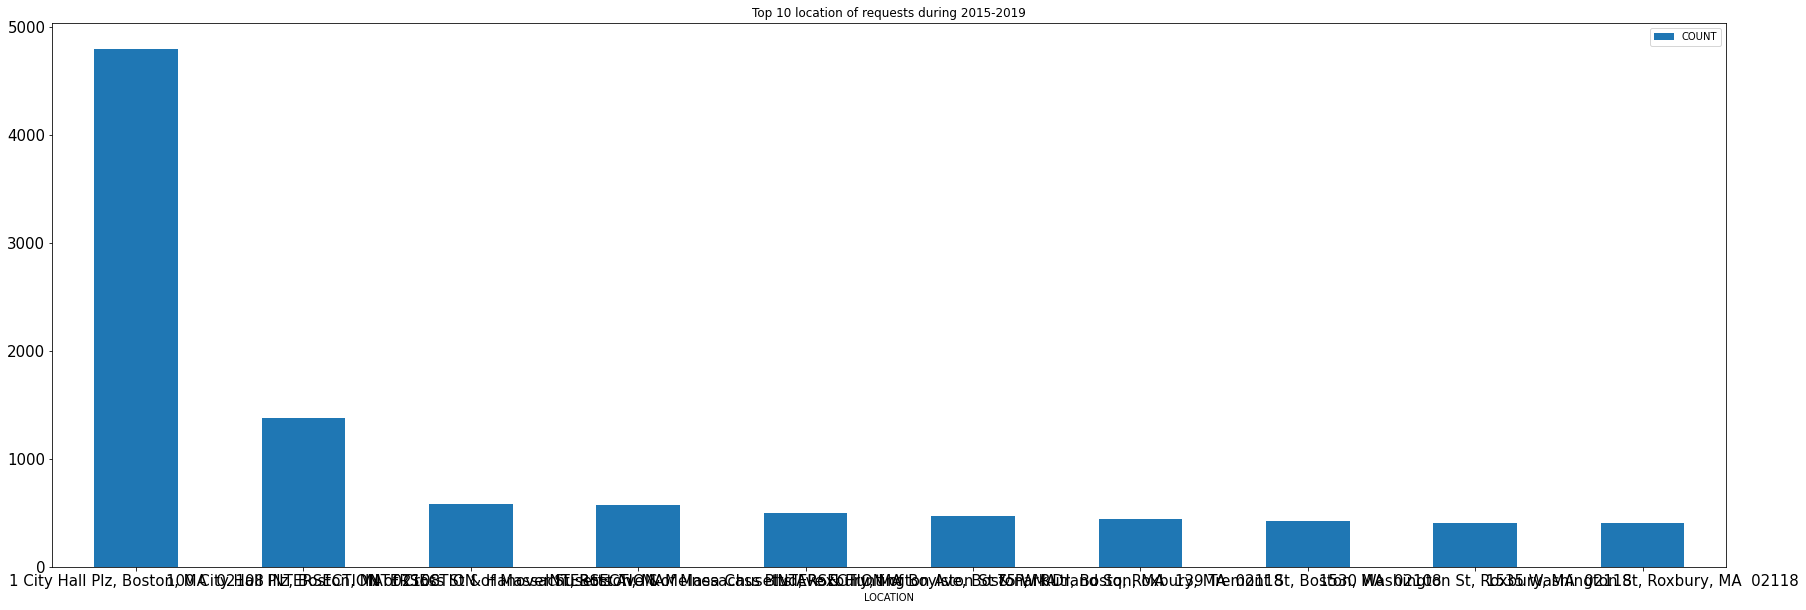

In [34]:
top_10_plot_post_covid = top_10_locations_pre_covid.plot.bar(x='LOCATION', y='COUNT', rot=0,
                                              figsize=(30,10), fontsize = 15,
                                              title="Top 10 location of requests during 2015-2019")

In [35]:
post_covid_location = group_and_count(post_covid_records, 'LOCATION')
print("\nTop 10 locations with highest number of complaints during 2020-2021")
top_10_locations_post_covid = post_covid_location.head(10)
top_10_locations_post_covid


Top 10 locations with highest number of complaints during 2020-2021


,LOCATION,COUNT,Percentage
133,"1 City Hall Plz, Boston, MA 02108",1533,0.513050
1925,"100 City Hall Plz, Boston, MA 02108",339,0.113453
16105,"160 Southampton St, Roxbury, MA 02118",226,0.075636
65056,"75 W Rutland Sq, Roxbury, MA 02118",204,0.068273
54121,"544P Massachusetts Ave, Roxbury, MA 02118",198,0.066265
14506,"1535 Washington St, Roxbury, MA 02118",197,0.065930
75320,"INTERSECTION of Chandler St & Cazenove St, Bos...",190,0.063587
75515,"INTERSECTION of Claremont St & Wellington St, ...",147,0.049197
78605,INTERSECTION of Massachusetts Ave & Melnea Cas...,143,0.047858
14495,"1530 Washington St, Roxbury, MA 02118",140,0.046854


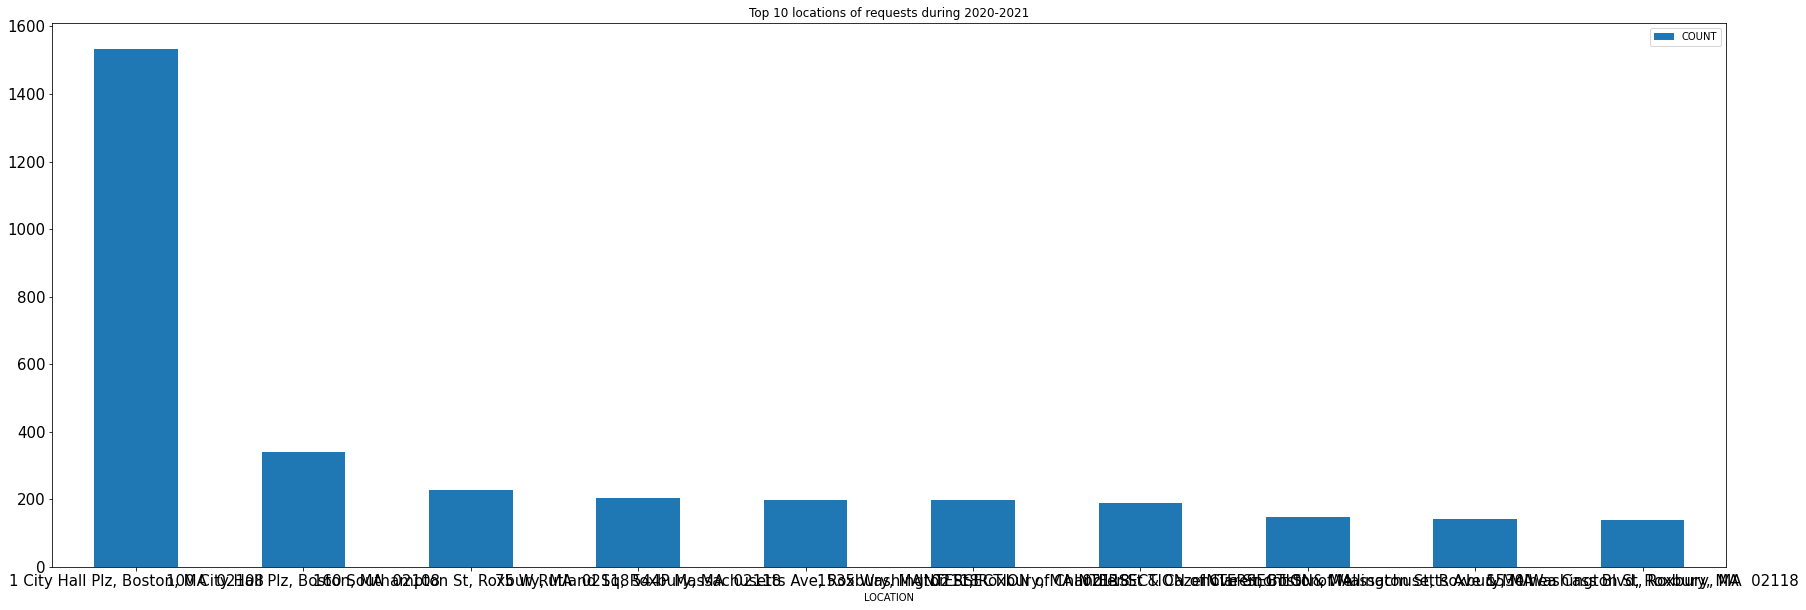

In [36]:
top_10_plot_post_covid = top_10_locations_post_covid.plot.bar(x='LOCATION', y='COUNT', rot=0,
                                              figsize=(30,10), fontsize = 15,
                                              title="Top 10 locations of requests during 2020-2021")

In [40]:
def get_season(month):
    seasons = {'SPRING': [3,4,5], 'SUMMER': [6,7,8], 'FALL': [9,10,11], 'WINTER': [12,1,2]}
    for season, months in seasons.items():
        if month in months:
            return season

post_covid_season = post_covid_records.copy()
pre_covid_records['OPEN_SEASON'] = pre_covid_records['OPEN_MONTH'].apply(lambda entry : get_season(entry))
post_covid_records['OPEN_SEASON'] = post_covid_records['OPEN_MONTH'].apply(lambda entry : get_season(entry))
# Another way of applying function to every entry of a column
# post_covid_records['SEASON'] = post_covid_records.apply(lambda row : get_season(row['OPEN_MONTH']), axis = 1)
# print(post_covid_records.iloc[0:11])
# print(post_covid_records.iloc[75000:75010])
# print(post_covid_records.iloc[150000:150011])
# print(post_covid_records.iloc[225000:225011])

In [48]:
pre_covid_season = group_and_count(pre_covid_records, 'OPEN_SEASON')
print("Complaints by Seasons during 2015-2019")
pre_covid_season

Complaints by Seasons during 2015-2019


,OPEN_SEASON,COUNT,Percentage
2,SUMMER,378523,26.657469
1,SPRING,355632,25.045371
3,WINTER,349713,24.628526
0,FALL,336083,23.668634


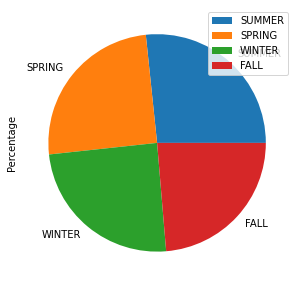

In [49]:
pre_covid_season = pre_covid_season.set_index('OPEN_SEASON')
pre_covid_season_plot = pre_covid_season.plot.pie(y='Percentage', figsize=(5, 5))

In [42]:
post_covid_season = group_and_count(post_covid_records, 'OPEN_SEASON')
print("\nComplaints by Seasons during 2020-2021")
post_covid_season
# Observe that the 311 cases during SPRING 2020 dropped by a significant margin compared to SPRING 2015-2019
# This could be the reason behind increase of cases in SUMMER 2020 and FALL 2020


Complaints by Seasons during 2020-2021


,OPEN_SEASON,COUNT,Percentage
2,SUMMER,90576,29.879757
0,FALL,80698,26.621142
3,WINTER,70095,23.123361
1,SPRING,61766,20.375740


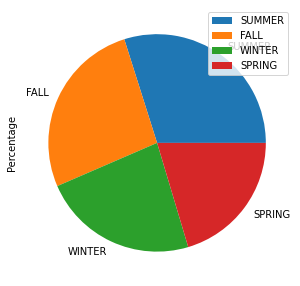

In [47]:
post_covid_season = post_covid_season.set_index('OPEN_SEASON')
post_covid_season_plot = post_covid_season.plot.pie(y='Percentage', figsize=(5, 5))

In [37]:
pre_covid_records['OPEN_DT'] = pd.to_datetime(pre_covid_records['OPEN_DT'])
pre_covid_records['CLOSED_DT'] = pd.to_datetime(pre_covid_records['CLOSED_DT'])
#pre_covid_records.dtypes

In [38]:
post_covid_records['OPEN_DT'] = pd.to_datetime(post_covid_records['OPEN_DT'])
post_covid_records['CLOSED_DT'] = pd.to_datetime(post_covid_records['CLOSED_DT'])
#post_covid_records.dtypes

In [13]:
def resolution_time(df):
        df['Resolution time'] = (df['CLOSED_DT'] - df['OPEN_DT']).dt.days
        return df

In [14]:
resolution_time(pre_covid_records)

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,...,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,OPEN_DAY,OPEN_MONTH,OPEN_YEAR,OPEN_SEASON,Resolution time
0,45708,Animal Found,101001240881,NaT,"961 William T Morrissey Blvd, Dorchester, MA ...",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.602538e+09,...,0,0,0,0,0,1,1,2015,WINTER,NaN
1,45887,Animal Found,101001240807,NaT,"27 Shepard St, Brighton, MA 02135",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.205456e+09,...,0,0,0,0,0,1,1,2015,WINTER,NaN
2,46110,Animal Found,101001240873,NaT,"834-842 Morton St, Dorchester, MA 02124",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.403860e+09,...,0,0,0,0,0,1,1,2015,WINTER,NaN
3,46395,Animal Found,101001240750,NaT,"730 Adams St, Dorchester, MA 02122",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.603632e+09,...,0,0,0,0,0,1,1,2015,WINTER,NaN
4,46468,Animal Found,101001240740,NaT,"4833 Washington St, West Roxbury, MA 02132",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.002788e+09,...,0,0,0,0,0,1,1,2015,WINTER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419946,2463235,Unsatisfactory Living Conditions,101003147591,2020-01-02,"333 Massachusetts Ave, Boston, MA 02115",2019-12-31,Housing,Constituent Call,Inspectional Services,4.022770e+08,...,0,0,1,0,1,31,12,2019,WINTER,2.0
1419947,2463267,Unsatisfactory Living Conditions,101003147797,NaT,"174 W Eighth St, South Boston, MA 02127",2019-12-31,Housing,Constituent Call,Inspectional Services,6.008190e+08,...,0,0,1,0,1,31,12,2019,WINTER,NaN
1419948,2496125,Unshoveled Sidewalk,101003147996,2019-12-31,"560 Boylston St, Boston, MA 02116",2019-12-31,Code Enforcement,Mobile Request,Public Works Department,4.010890e+08,...,0,0,0,0,0,31,12,2019,WINTER,0.0
1419949,2504243,Utility Casting Repair,101003147474,NaT,"567-569 Bennington St, East Boston, MA 02128",2019-12-31,Highway Maintenance,City Worker App,Public Works Department,1.008770e+08,...,0,0,0,0,0,31,12,2019,WINTER,NaN


In [15]:
resolution_time(post_covid_records)

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,...,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,OPEN_DAY,OPEN_MONTH,OPEN_YEAR,OPEN_SEASON,Resolution time
0,1708,Abandoned Bicycle,101003148558,2020-01-13,"461 Gallivan Blvd, Dorchester, MA 02124",2020-01-01,Abandoned Bicycle,Constituent Call,Mayor's 24 Hour Hotline,1.605083e+09,...,0,1,0,1,1,1,1,2020,WINTER,12.0
1,3785,Abandoned Bicycle,101003148635,2020-03-12,"70 Burbank St, Boston, MA 02115",2020-01-01,Abandoned Bicycle,Mobile Request,Mayor's 24 Hour Hotline,4.014760e+08,...,0,1,0,1,1,1,1,2020,WINTER,71.0
2,9243,Abandoned Vehicles,101003148579,2020-01-02,"8 Montana St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202494e+09,...,0,0,0,0,0,1,1,2020,WINTER,1.0
3,9265,Abandoned Vehicles,101003148438,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202261e+09,...,0,0,0,0,0,1,1,2020,WINTER,1.0
4,9482,Abandoned Vehicles,101003148439,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202261e+09,...,0,0,0,0,0,1,1,2020,WINTER,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303130,2470736,"Unsatisfactory Utilities - Electrical, Plumbing",101003578428,NaT,"20 Thorn St, Mattapan, MA 02126",2020-12-31,Housing,Constituent Call,Inspectional Services,1.801555e+09,...,0,0,1,0,1,31,12,2020,WINTER,NaN
303131,2494697,Unshoveled Sidewalk,101003578654,2020-12-31,"INTERSECTION of Farmington Rd & Manthorne Rd, ...",2020-12-31,Code Enforcement,Mobile Request,Public Works Department,NaN,...,0,0,0,0,0,31,12,2020,WINTER,0.0
303132,2505440,Work Hours-Loud Noise Complaints,101003578193,2021-01-08,"1091 Boylston St, Boston, MA 02215",2020-12-31,Highway Maintenance,Constituent Call,Public Works Department,5.041620e+08,...,0,0,0,0,0,31,12,2020,WINTER,8.0
303133,2505959,Work Hours-Loud Noise Complaints,101003578194,2021-01-07,INTERSECTION of Boylston St & Massachusetts Tp...,2020-12-31,Highway Maintenance,Constituent Call,Public Works Department,NaN,...,0,0,0,0,0,31,12,2020,WINTER,7.0
